In [ ]:
import pandas as pd
import numpy as np

path = "bin/Reduced_Dimension_Dataset_1500_pd_swedd.csv"

feature_matrix = pd.read_csv(path)

dfXY = feature_matrix[list(feature_matrix.columns[1:-1])]
X = dfXY.values

Y = feature_matrix[["Class"]]
Y = Y.values
Y = Y.reshape(Y.shape[0],)

print(X.shape)
print(Y.shape)

,Unnamed: 0,Patient_No,Point1_x,Point1_y,Point2_x,Point2_y,Point3_x,Point3_y,Point4_x,Point4_y,...,Point8_y,Point9_x,Point9_y,Point10_x,Point10_y,Point11_x,Point11_y,Point12_x,Point12_y,Class
0,545,3451,6.491406,16.212321,-3.962368,-28.825742,0.211958,-35.878955,-4.332946,-37.799839,...,-20.170732,-0.374359,-37.097659,-30.429515,-24.623699,-1.543492,14.267667,19.489894,1.080483,1
1,548,3462,-15.948125,-2.757196,-16.695702,-32.154077,-19.725000,-30.570459,-34.553279,-27.967779,...,-23.367590,-1.994850,-13.609681,14.447140,-16.819768,10.603775,-5.760421,-5.991049,-18.640087,1
2,160,3503,2.435579,8.773307,-7.872194,0.103264,-6.258084,-6.370838,-7.010847,-11.058239,...,11.151632,-3.322450,-7.580751,-2.560822,-16.073886,-15.267158,1.994105,-0.421618,2.219185,0
3,584,143757,-3.944272,-10.068883,5.964242,8.149374,29.158420,-26.511144,1.335251,-1.229020,...,-18.969229,-13.125560,-3.657658,-8.295269,11.750336,-5.765402,-3.115997,6.386398,0.931062,1
4,315,3367,-19.403923,-20.534896,-20.115741,12.904036,-37.193387,6.302583,-28.642644,6.452328,...,-18.650947,-11.382426,67.897569,-11.715713,-14.922582,1.685160,5.035301,-16.539899,14.729506,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,668,168124,22.711426,20.854192,12.479790,-0.002397,-5.369175,-0.349491,15.350356,-5.753708,...,15.629261,11.056445,-4.515859,-3.689546,-5.432049,13.525055,8.544002,14.498791,16.952794,1
1131,763,213005,0.114068,0.514600,-0.928581,-2.714964,-7.614999,-3.738619,9.053875,6.968915,...,-5.524204,-3.209899,-5.441319,14.768639,3.264244,10.644337,-23.945150,-5.434159,-20.932931,1
1132,407,3088,3.330190,-1.949345,-3.222261,-10.839505,1.963971,-48.529697,-5.033538,-53.812322,...,-7.541410,-1.355792,-1.094912,-7.985205,-18.967005,21.409682,16.844562,23.275729,6.863706,1
1133,265,3224,20.252781,-10.387793,-9.334774,-17.050183,-32.041207,57.953227,-13.978163,20.475611,...,4.033396,3.681127,8.359289,17.383024,-3.800033,6.550948,14.594485,25.977405,-10.478916,1


In [ ]:
neg = feature_matrix["Class"].values.tolist().count(0)
ratio = neg/(X.shape[0]-neg)
ratio

0.19348054679284962

In [ ]:
# Calculate class weights based on the inverse of class frequencies
class_counts = np.bincount(Y)
class_weights = {i: len(Y) / (len(class_counts) * count) for i, count in enumerate(class_counts)}

# SVM LINEAR

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    #'gamma': ['scale', 'auto'],
}

clf = SVC(class_weight="balanced")

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=kfold, scoring='accuracy')

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []
sensitivity_list = []
roc_auc_list = []

for train_index, test_index in kfold.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    grid_search.fit(X_train, Y_train)
    y_pred = grid_search.predict(X_test)

    accuracy = grid_search.score(X_test, Y_test)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    roc_auc = roc_auc_score(Y_test, y_pred)

    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    roc_auc_list.append(roc_auc)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)


print("Accuracy List:", accuracy_list)
print("Mean Accuracy:", np.mean(accuracy_list))
print("Standard Deviation of Accuracy:", np.std(accuracy_list))
print()
print("Precision List:", precision_list)
print("Mean Precision:", np.mean(precision_list))
print("Standard Deviation of Precision:", np.std(precision_list))
print()
print("Recall List:", recall_list)
print("Mean Recall:", np.mean(recall_list))
print("Standard Deviation of Recall:", np.std(recall_list))
print()
print("F1-score List:", f1_list)
print("Mean F1-score:", np.mean(f1_list))
print("Standard Deviation of F1-score:", np.std(f1_list))
print()
print("Specificity List:", specificity_list)
print("Mean Specificity:", np.mean(specificity_list))
print("Standard Deviation of Specificity:", np.std(specificity_list))
print()
print("Sensitivity List:", sensitivity_list)
print("Mean Sensitivity:", np.mean(sensitivity_list))
print("Standard Deviation of Sensitivity:", np.std(sensitivity_list))
print()
print("AUC-ROC List:", roc_auc_list)
print("Mean AUC-ROC:", np.mean(roc_auc_list))
print("Standard Deviation of AUC-ROC:", np.std(roc_auc_list))
print()
print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

param_grid = {
    'C': [1, 10,100],
    'kernel': ['linear'],
    #'gamma': ['scale', 'auto'],
}

clf = SVC(class_weight="balanced")

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=kfold, scoring='accuracy')
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []
sensitivity_list = []
roc_auc_list = []

for train_index, test_index in kfold.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    grid_search.fit(X_train, Y_train)
    y_pred = grid_search.predict(X_test)

    accuracy = grid_search.score(X_test, Y_test)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    roc_auc = roc_auc_score(Y_test, y_pred)

    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    roc_auc_list.append(roc_auc)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)


print("Accuracy List:", accuracy_list)
print("Mean Accuracy:", np.mean(accuracy_list))
print("Standard Deviation of Accuracy:", np.std(accuracy_list))
print()
print("Precision List:", precision_list)
print("Mean Precision:", np.mean(precision_list))
print("Standard Deviation of Precision:", np.std(precision_list))
print()
print("Recall List:", recall_list)
print("Mean Recall:", np.mean(recall_list))
print("Standard Deviation of Recall:", np.std(recall_list))
print()
print("F1-score List:", f1_list)
print("Mean F1-score:", np.mean(f1_list))
print("Standard Deviation of F1-score:", np.std(f1_list))
print()
print("Specificity List:", specificity_list)
print("Mean Specificity:", np.mean(specificity_list))
print("Standard Deviation of Specificity:", np.std(specificity_list))
print()
print("Sensitivity List:", sensitivity_list)
print("Mean Sensitivity:", np.mean(sensitivity_list))
print("Standard Deviation of Sensitivity:", np.std(sensitivity_list))
print()
print("AUC-ROC List:", roc_auc_list)
print("Mean AUC-ROC:", np.mean(roc_auc_list))
print("Standard Deviation of AUC-ROC:", np.std(roc_auc_list))
print()
print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Accuracy List: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Accuracy: 1.0
Standard Deviation of Accuracy: 0.0

Precision List: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Precision: 1.0
Standard Deviation of Precision: 0.0

Recall List: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Recall: 1.0
Standard Deviation of Recall: 0.0

F1-score List: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean F1-score: 1.0
Standard Deviation of F1-score: 0.0

Specificity List: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Specificity: 1.0
Standard Deviation of Specificity: 0.0

Sensitivity List: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Sensitivity: 1.0
Standard Deviation of Sensitivity: 0.0

AUC-ROC List: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean AUC-ROC: 1.0
Standard Deviation of AUC-ROC: 0.0

Best parameters: {'C': 1, 'kernel': 'linear'}
Best Score: 1.0


In [ ]:
#to be run
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

# Calculate class weights based on the inverse of class frequencies
# class_counts = np.bincount(Y)
# class_weights = {i: len(Y) / (len(class_counts) * count) for i, count in enumerate(class_counts)}

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto'],
}

clf = SVC(class_weight="balanced")

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=kfold, scoring='accuracy')

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for train_index, test_index in kfold.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    grid_search.fit(X_train, Y_train)
    y_pred = grid_search.predict(X_test)

    accuracy = grid_search.score(X_test, Y_test)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

print("Best parameters:", grid_search.best_params_)
print("Accuracy List:", accuracy_list)
print("Mean Accuracy:", np.mean(accuracy_list))
print("Standard Deviation of Accuracy:", np.std(accuracy_list))
print()
print("Precision List:", precision_list)
print("Mean Precision:", np.mean(precision_list))
print("Standard Deviation of Precision:", np.std(precision_list))
print()
print("Recall List:", recall_list)
print("Mean Recall:", np.mean(recall_list))
print("Standard Deviation of Recall:", np.std(recall_list))
print()
print("F1-score List:", f1_list)
print("Mean F1-score:", np.mean(f1_list))
print("Standard Deviation of F1-score:", np.std(f1_list))


# SVM RBF

In [ ]:
#to be run
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

kfold = KFold(n_splits=5, shuffle=True, random_state=12)

# Calculate class weights based on the inverse of class frequencies
Y = np.array([int(i) for i in list(Y)])
class_counts = np.bincount(Y)
class_weights = {i: len(Y) / (len(class_counts) * count) for i, count in enumerate(class_counts)}

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto'],
}

clf = SVC(class_weight=class_weights)

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=kfold, scoring='accuracy')

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []
sensitivity_list = []
roc_auc_list = []

for train_index, test_index in kfold.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    grid_search.fit(X_train, Y_train)
    y_pred = grid_search.predict(X_test)

    accuracy = grid_search.score(X_test, Y_test)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    roc_auc = roc_auc_score(Y_test, y_pred)

    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    roc_auc_list.append(roc_auc)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)


print("Accuracy List:", accuracy_list)
print("Mean Accuracy:", np.mean(accuracy_list))
print("Standard Deviation of Accuracy:", np.std(accuracy_list))
print()
print("Precision List:", precision_list)
print("Mean Precision:", np.mean(precision_list))
print("Standard Deviation of Precision:", np.std(precision_list))
print()
print("Recall List:", recall_list)
print("Mean Recall:", np.mean(recall_list))
print("Standard Deviation of Recall:", np.std(recall_list))
print()
print("F1-score List:", f1_list)
print("Mean F1-score:", np.mean(f1_list))
print("Standard Deviation of F1-score:", np.std(f1_list))
print()
print("Specificity List:", specificity_list)
print("Mean Specificity:", np.mean(specificity_list))
print("Standard Deviation of Specificity:", np.std(specificity_list))
print()
print("Sensitivity List:", sensitivity_list)
print("Mean Sensitivity:", np.mean(sensitivity_list))
print("Standard Deviation of Sensitivity:", np.std(sensitivity_list))
print()
print("AUC-ROC List:", roc_auc_list)
print("Mean AUC-ROC:", np.mean(roc_auc_list))
print("Standard Deviation of AUC-ROC:", np.std(roc_auc_list))
print()
print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Accuracy List: [0.9691629955947136, 0.9515418502202643, 0.9823788546255506, 0.9559471365638766, 0.9515418502202643]
Mean Accuracy: 0.9621145374449339
Standard Deviation of Accuracy: 0.012016019116287103

Precision List: [0.9735449735449735, 0.9783783783783784, 0.9896907216494846, 0.9578947368421052, 0.9795918367346939]
Mean Precision: 0.9758201294299271
Standard Deviation of Precision: 0.010389030521898655

Recall List: [0.989247311827957, 0.9627659574468085, 0.9896907216494846, 0.9891304347826086, 0.964824120603015]
Mean Recall: 0.9791317092619748
Standard Deviation of Recall: 0.012540634717741195

F1-score List: [0.9813333333333333, 0.9705093833780161, 0.9896907216494846, 0.9732620320855614, 0.9721518987341772]
Mean F1-score: 0.9773894738361145
Standard Deviation of F1-score: 0.007192751053164631

Specificity List: [0.8780487804878049, 0.8974358974358975, 0.9393939393939394, 0.813953488372093, 0.8571428571428571]
Mean Specificity: 0.8771949925665184
Standard Deviation of Specificity:

# LOGISTIC REGRESSION

In [ ]:
#to be run
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import precision_score, recall_score, f1_score

kfold = KFold(n_splits=5, shuffle=True, random_state=12)

# Calculate class weights based on the class frequencies
Y = np.array([int(i) for i in list(Y)])
class_counts = np.bincount(Y)
total_samples = len(Y)
class_weights = {i: total_samples / (len(class_counts) * count) for i, count in enumerate(class_counts)}

param_grid = {
    'C': [ 10,100,1000],
    'solver': ['liblinear'],
}
#class_weight=class_weights
clf = LogisticRegression(class_weight=class_weights)

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=kfold, scoring='accuracy')

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []
sensitivity_list = []
roc_auc_list = []

for train_index, test_index in kfold.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    grid_search.fit(X_train, Y_train)
    y_pred = grid_search.predict(X_test)

    accuracy = grid_search.score(X_test, Y_test)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    roc_auc = roc_auc_score(Y_test, y_pred)

    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    roc_auc_list.append(roc_auc)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)


print("Accuracy List:", accuracy_list)
print("Mean Accuracy:", np.mean(accuracy_list))
print("Standard Deviation of Accuracy:", np.std(accuracy_list))
print()
print("Precision List:", precision_list)
print("Mean Precision:", np.mean(precision_list))
print("Standard Deviation of Precision:", np.std(precision_list))
print()
print("Recall List:", recall_list)
print("Mean Recall:", np.mean(recall_list))
print("Standard Deviation of Recall:", np.std(recall_list))
print()
print("F1-score List:", f1_list)
print("Mean F1-score:", np.mean(f1_list))
print("Standard Deviation of F1-score:", np.std(f1_list))
print()
print("Specificity List:", specificity_list)
print("Mean Specificity:", np.mean(specificity_list))
print("Standard Deviation of Specificity:", np.std(specificity_list))
print()
print("Sensitivity List:", sensitivity_list)
print("Mean Sensitivity:", np.mean(sensitivity_list))
print("Standard Deviation of Sensitivity:", np.std(sensitivity_list))
print()
print("AUC-ROC List:", roc_auc_list)
print("Mean AUC-ROC:", np.mean(roc_auc_list))
print("Standard Deviation of AUC-ROC:", np.std(roc_auc_list))
print()
print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy List: [0.8854625550660793, 0.8942731277533039, 0.933920704845815, 0.920704845814978, 0.8986784140969163]
Mean Accuracy: 0.9066079295154186
Standard Deviation of Accuracy: 0.01792686339152056

Precision List: [0.9942196531791907, 0.9726775956284153, 0.9781420765027322, 0.9653179190751445, 0.9824561403508771]
Mean Precision: 0.9785626769472721
Standard Deviation of Precision: 0.009700872743798527

Recall List: [0.8730964467005076, 0.9035532994923858, 0.9421052631578948, 0.9329608938547486, 0.8936170212765957]
Mean Recall: 0.9090665848964266
Standard Deviation of Recall: 0.025398537106233816

F1-score List: [0.9297297297297297, 0.9368421052631579, 0.9597855227882037, 0.9488636363636364, 0.935933147632312]
Mean F1-score: 0.942230828355408
Standard Deviation of F1-score: 0.010743723978274842


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

params = {
    'C': 10,
    'solver': 'liblinear',
}

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=12)

clf = LogisticRegression(**params)

clf.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

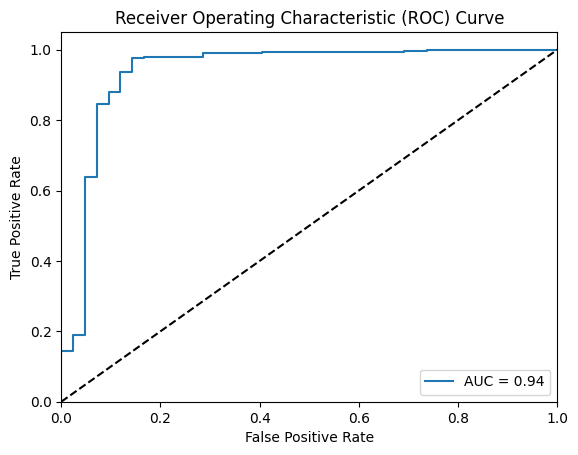

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict the probabilities of the positive class
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# RANDOM FOREST

In [ ]:
#to be run
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import random

kfold = KFold(n_splits=5, shuffle=True, random_state=12)

# Calculate class weights based on the class frequencies
Y = np.array([int(i) for i in list(Y)])
class_counts = np.bincount(Y)
total_samples = len(Y)
class_weights = {i: total_samples / (len(class_counts) * count) for i, count in enumerate(class_counts)}

param_grid = {
    'max_depth': [5, 10, 15],

    'n_estimators': [20, 40, 60, 80],
}

# Create the base classifier (Random Forest) with class weights
clf = RandomForestClassifier(class_weight='balanced', random_state=random.seed(12))

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=kfold, scoring='accuracy')

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []
sensitivity_list = []
roc_auc_list = []

for train_index, test_index in kfold.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    grid_search.fit(X_train, Y_train)
    y_pred = grid_search.predict(X_test)

    accuracy = grid_search.score(X_test, Y_test)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    roc_auc = roc_auc_score(Y_test, y_pred)

    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    roc_auc_list.append(roc_auc)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)


print("Accuracy List:", accuracy_list)
print("Mean Accuracy:", np.mean(accuracy_list))
print("Standard Deviation of Accuracy:", np.std(accuracy_list))
print()
print("Precision List:", precision_list)
print("Mean Precision:", np.mean(precision_list))
print("Standard Deviation of Precision:", np.std(precision_list))
print()
print("Recall List:", recall_list)
print("Mean Recall:", np.mean(recall_list))
print("Standard Deviation of Recall:", np.std(recall_list))
print()
print("F1-score List:", f1_list)
print("Mean F1-score:", np.mean(f1_list))
print("Standard Deviation of F1-score:", np.std(f1_list))
print()
print("Specificity List:", specificity_list)
print("Mean Specificity:", np.mean(specificity_list))
print("Standard Deviation of Specificity:", np.std(specificity_list))
print()
print("Sensitivity List:", sensitivity_list)
print("Mean Sensitivity:", np.mean(sensitivity_list))
print("Standard Deviation of Sensitivity:", np.std(sensitivity_list))
print()
print("AUC-ROC List:", roc_auc_list)
print("Mean AUC-ROC:", np.mean(roc_auc_list))
print("Standard Deviation of AUC-ROC:", np.std(roc_auc_list))
print()
print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'n_estimators': 20}
Accuracy List: [0.9691629955947136, 0.947136563876652, 0.960352422907489, 0.9647577092511013, 0.947136563876652]
Mean Accuracy: 0.9577092511013217
Standard Deviation of Accuracy: 0.009071039771794687

Precision List: [0.975, 0.9556650246305419, 0.9641025641025641, 0.9672131147540983, 0.9731182795698925]
Mean Precision: 0.9670197966114195
Standard Deviation of Precision: 0.006904398665642517

Recall List: [0.9898477157360406, 0.9847715736040609, 0.9894736842105263, 0.9888268156424581, 0.9627659574468085]
Mean Recall: 0.9831371493279788
Standard Deviation of Recall: 0.010346134350360763

F1-score List: [0.982367758186398, 0.97, 0.9766233766233765, 0.9779005524861879, 0.9679144385026738]
Mean F1-score: 0.9749612251597272
Standard Deviation of F1-score: 0.005301510753943481


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import random

kfold = KFold(n_splits=5, shuffle=True, random_state=12)

# Calculate class weights based on the class frequencies
class_counts = np.bincount(Y)
total_samples = len(Y)
class_weights = {i: total_samples / (len(class_counts) * count) for i, count in enumerate(class_counts)}

param_grid = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [200, 300, 400, 500],
    'n_estimators': [10, 20, 30, 40],
}

# Create the base classifier (Random Forest) with class weights
clf = RandomForestClassifier(class_weight='balanced',random_state = random.seed(12))

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=kfold, scoring='accuracy')

grid_search.fit(X, Y)

print("Best parameters:", grid_search.best_params_)
print("Best Score", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 10}
Best Score 1.0


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

params = {
    'max_depth': 5,
    'n_estimators': 20,
    #'early_stopping_rounds':5
}

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=12)

clf = RandomForestClassifier(class_weight='balanced', random_state = random.seed(12))

clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

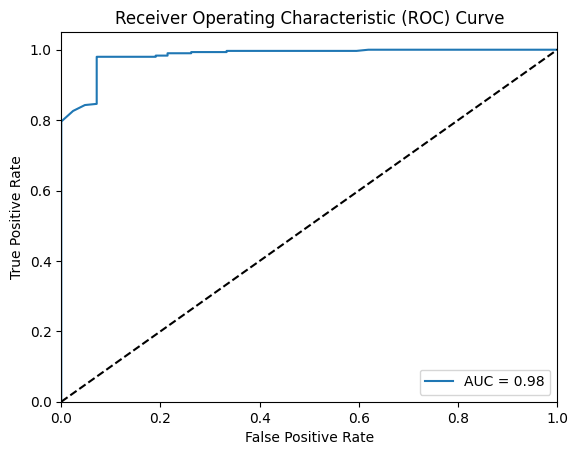

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict the probabilities of the positive class
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(len(fpr))
print(len(tpr))
print(len(thresholds))

48
48
48


In [ ]:
tpr = tpr.tolist()
fpr = fpr.tolist()
diff = [tpr[i]-fpr[i] for i in range(len(tpr))]

idx = diff.index(max(diff))

print(tpr[idx])
print(fpr[idx])

print("Optimal Threshold", thresholds[idx])


0.979933110367893
0.07142857142857142
Optimal Threshold 0.71


In [ ]:
#Confusion matrix
#We compare labels and plot them based on correct or wrong predictions.
#Since sigmoid outputs probabilities we need to apply threshold to convert to label.

opt_thresh=0.71

y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred = [1 if i>=opt_thresh else 0 for i in y_pred_proba]

import sklearn
cm= sklearn.metrics.confusion_matrix(y_test, y_pred)
print(cm)

true_rate =  (cm[0][0]+cm[1][1])
false_rate = (cm[0][1]+cm[1][0])

accuracy = float(true_rate/(true_rate+false_rate))
recall = float(cm[0][0]/(cm[0][0] + cm[0][1]))
precision = float(cm[0][0]/(cm[0][0] + cm[1][0]))
f1_score = 2*float(float(precision*recall)/float(precision+recall))

print("Accuracy = ", accuracy)
print("Recall = ", recall)
print("Precision = ", precision)
print("F1 Score = ", f1_score)

[[ 39   3]
 [  6 293]]
Accuracy =  0.9736070381231672
Recall =  0.9285714285714286
Precision =  0.8666666666666667
F1 Score =  0.896551724137931


# XG BOOST

In [ ]:
#to be run
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.metrics import f1_score, make_scorer

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

# Calculate class weights based on the class frequencies
Y = np.array([int(i) for i in list(Y)])
class_counts = np.bincount(Y)
total_samples = len(Y)
class_weights = total_samples / (len(class_counts) * class_counts)

param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.4,0.05], #'learning_rate': [0.5, 0.01, 0.001]
    'n_estimators': [20, 30, 50, 60], # 'n_estimators': [20, 30, 40, 60],
    'scale_pos_weight': [ratio],
}

n = 1
for i in param_grid.keys():
    n = n * len(param_grid[i])

print("No. of Permutations =", n)

clf = xgb.XGBClassifier()

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=kfold, scoring='accuracy')

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []
sensitivity_list = []
roc_auc_list = []

for train_index, test_index in kfold.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    grid_search.fit(X_train, Y_train)
    y_pred = grid_search.predict(X_test)

    accuracy = grid_search.score(X_test, Y_test)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    roc_auc = roc_auc_score(Y_test, y_pred)

    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    roc_auc_list.append(roc_auc)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)


print("Accuracy List:", accuracy_list)
print("Mean Accuracy:", np.mean(accuracy_list))
print("Standard Deviation of Accuracy:", np.std(accuracy_list))
print()
print("Precision List:", precision_list)
print("Mean Precision:", np.mean(precision_list))
print("Standard Deviation of Precision:", np.std(precision_list))
print()
print("Recall List:", recall_list)
print("Mean Recall:", np.mean(recall_list))
print("Standard Deviation of Recall:", np.std(recall_list))
print()
print("F1-score List:", f1_list)
print("Mean F1-score:", np.mean(f1_list))
print("Standard Deviation of F1-score:", np.std(f1_list))
print()
print("Specificity List:", specificity_list)
print("Mean Specificity:", np.mean(specificity_list))
print("Standard Deviation of Specificity:", np.std(specificity_list))
print()
print("Sensitivity List:", sensitivity_list)
print("Mean Sensitivity:", np.mean(sensitivity_list))
print("Standard Deviation of Sensitivity:", np.std(sensitivity_list))
print()
print("AUC-ROC List:", roc_auc_list)
print("Mean AUC-ROC:", np.mean(roc_auc_list))
print("Standard Deviation of AUC-ROC:", np.std(roc_auc_list))
print()
print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

No. of Permutations = 24
Accuracy List: [0.9559471365638766, 0.9427312775330396, 0.960352422907489, 0.960352422907489, 0.947136563876652]
Mean Accuracy: 0.9533039647577091
Standard Deviation of Accuracy: 0.0071577430877849905

Precision List: [0.9641025641025641, 0.988950276243094, 0.9547738693467337, 0.9738219895287958, 0.978494623655914]
Mean Precision: 0.9720286645754204
Standard Deviation of Precision: 0.011763644076053001

Recall List: [0.9842931937172775, 0.9421052631578948, 1.0, 0.9789473684210527, 0.9578947368421052]
Mean Recall: 0.972648112427666
Standard Deviation of Recall: 0.02036635475860156

F1-score List: [0.9740932642487047, 0.9649595687331537, 0.9768637532133677, 0.9763779527559056, 0.9680851063829788]
Mean F1-score: 0.9720759290668222
Standard Deviation of F1-score: 0.0047343333048746935

Best parameters: {'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 60, 'scale_pos_weight': 0.19348054679284962}
Best Score: 0.9603727763948757


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

params = {
    'learning_rate': 0.4,
    'max_depth': 5,
    'n_estimators': 60,
    #'early_stopping_rounds':5
}

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=12)
clf = xgb.XGBClassifier(**params)
#clf = RandomForestClassifier(class_weight='balanced', random_state = random.seed(12))

clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=60, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

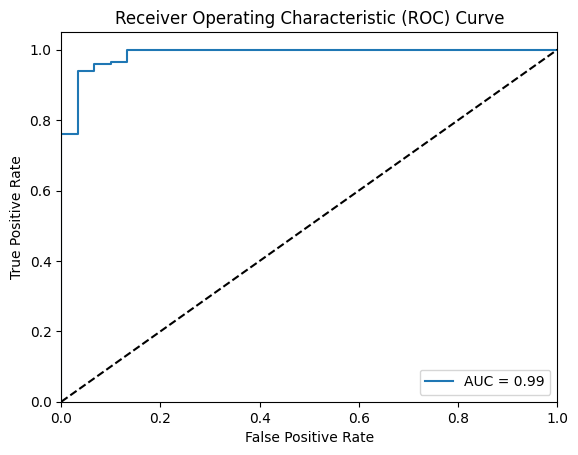

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict the probabilities of the positive class
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(len(fpr))
print(len(tpr))
print(len(thresholds))

23
23
23


In [ ]:
tpr = tpr.tolist()
fpr = fpr.tolist()
diff = [tpr[i]-fpr[i] for i in range(len(tpr))]

idx = diff.index(max(diff))

print(tpr[idx])
print(fpr[idx])

print("Optimal Threshold", thresholds[idx])


0.9390862944162437
0.03333333333333333
Optimal Threshold 0.9618215


In [ ]:
#Confusion matrix
#We compare labels and plot them based on correct or wrong predictions.
#Since sigmoid outputs probabilities we need to apply threshold to convert to label.

opt_thresh=0.961

y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred = [1 if i>=opt_thresh else 0 for i in y_pred_proba]

import sklearn
cm= sklearn.metrics.confusion_matrix(y_test, y_pred)
print(cm)

true_rate =  (cm[0][0]+cm[1][1])
false_rate = (cm[0][1]+cm[1][0])

accuracy = float(true_rate/(true_rate+false_rate))
recall = float(cm[0][0]/(cm[0][0] + cm[0][1]))
precision = float(cm[0][0]/(cm[0][0] + cm[1][0]))
f1_score = 2*float(float(precision*recall)/float(precision+recall))

print("Accuracy = ", accuracy)
print("Recall = ", recall)
print("Precision = ", precision)
print("F1 Score = ", f1_score)

[[ 29   1]
 [ 12 185]]
Accuracy =  0.9427312775330396
Recall =  0.9666666666666667
Precision =  0.7073170731707317
F1 Score =  0.8169014084507042


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

params = {
    'max_depth': 5,
    'learning_rate': 0.4,
    'n_estimators': 60,
    # 'early_stopping_rounds':5
}

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

eval_set = [(X_test, y_test)]
clf = xgb.XGBClassifier(**params)

clf.fit(X_train, y_train, eval_set=eval_set)

probs_lr = clf.predict_proba(X_test)

[0]	validation_0-logloss:0.44043
[1]	validation_0-logloss:0.31673
[2]	validation_0-logloss:0.25296
[3]	validation_0-logloss:0.21594
[4]	validation_0-logloss:0.19425
[5]	validation_0-logloss:0.17392
[6]	validation_0-logloss:0.16319
[7]	validation_0-logloss:0.15693
[8]	validation_0-logloss:0.15745
[9]	validation_0-logloss:0.15577
[10]	validation_0-logloss:0.15481
[11]	validation_0-logloss:0.14515
[12]	validation_0-logloss:0.14736
[13]	validation_0-logloss:0.14596
[14]	validation_0-logloss:0.14431
[15]	validation_0-logloss:0.14661
[16]	validation_0-logloss:0.14723
[17]	validation_0-logloss:0.14778
[18]	validation_0-logloss:0.14732
[19]	validation_0-logloss:0.14955
[20]	validation_0-logloss:0.14760
[21]	validation_0-logloss:0.14577
[22]	validation_0-logloss:0.14117
[23]	validation_0-logloss:0.14102
[24]	validation_0-logloss:0.14176
[25]	validation_0-logloss:0.14303
[26]	validation_0-logloss:0.14504
[27]	validation_0-logloss:0.14266
[28]	validation_0-logloss:0.14407
[29]	validation_0-loglos

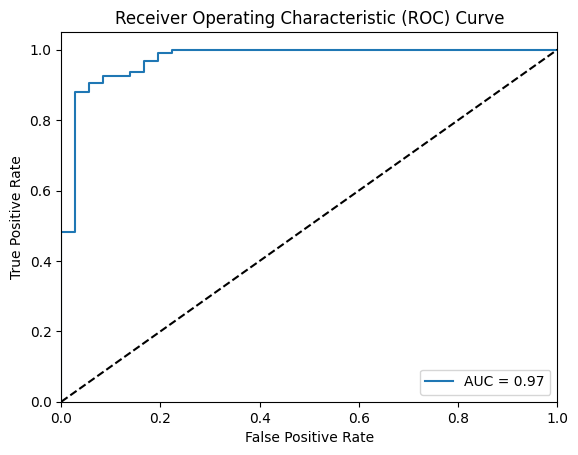

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict the probabilities of the positive class
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred_proba

array([0.9975304 , 0.9993793 , 0.99574935, 0.99395657, 0.9492162 ,
       0.99479467, 0.9822391 , 0.983739  , 0.99559855, 0.98862153,
       0.96792054, 0.94018775, 0.99977523, 0.99543095, 0.99233174,
       0.9990439 , 0.9984547 , 0.23827335, 0.998611  , 0.24132721,
       0.99500316, 0.99820054, 0.56405324, 0.99938595, 0.9829253 ,
       0.9986168 , 0.8660382 , 0.99373215, 0.39429396, 0.9944766 ,
       0.6305126 , 0.996856  , 0.9968862 , 0.8539454 , 0.9822641 ,
       0.9933587 , 0.9993376 , 0.9721806 , 0.9922139 , 0.99566025,
       0.9898812 , 0.99950624, 0.99989367, 0.68624365, 0.992407  ,
       0.9269752 , 0.15809157, 0.62274885, 0.99381024, 0.89453936,
       0.9845412 , 0.99818486, 0.9697703 , 0.99926025, 0.9981469 ,
       0.70397824, 0.9065008 , 0.9846036 , 0.9897668 , 0.99538225,
       0.9997788 , 0.9906901 , 0.46226376, 0.9990901 , 0.99606884,
       0.9866485 , 0.9993911 , 0.9979073 , 0.20525365, 0.99394256,
       0.99975985, 0.9999206 , 0.9960936 , 0.9895286 , 0.99950

## LIGHT GBM

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import lightgbm as lgb

kfold = KFold(n_splits=5, shuffle=True, random_state=12)

# Calculate class weights based on the class frequencies
Y = np.array([int(i) for i in list(Y)])
class_counts = np.bincount(Y)
total_samples = len(Y)
class_weights = total_samples / (len(class_counts) * class_counts)

param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001],
    'scale_pos_weight': class_weights,
}

clf = lgb.LGBMClassifier()

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=kfold, scoring='accuracy')

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []
sensitivity_list = []
roc_auc_list = []

for train_index, test_index in kfold.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    grid_search.fit(X_train, Y_train)
    y_pred = grid_search.predict(X_test)

    accuracy = grid_search.score(X_test, Y_test)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    roc_auc = roc_auc_score(Y_test, y_pred)

    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    roc_auc_list.append(roc_auc)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)


print("Accuracy List:", accuracy_list)
print("Mean Accuracy:", np.mean(accuracy_list))
print("Standard Deviation of Accuracy:", np.std(accuracy_list))
print()
print("Precision List:", precision_list)
print("Mean Precision:", np.mean(precision_list))
print("Standard Deviation of Precision:", np.std(precision_list))
print()
print("Recall List:", recall_list)
print("Mean Recall:", np.mean(recall_list))
print("Standard Deviation of Recall:", np.std(recall_list))
print()
print("F1-score List:", f1_list)
print("Mean F1-score:", np.mean(f1_list))
print("Standard Deviation of F1-score:", np.std(f1_list))
print()
print("Specificity List:", specificity_list)
print("Mean Specificity:", np.mean(specificity_list))
print("Standard Deviation of Specificity:", np.std(specificity_list))
print()
print("Sensitivity List:", sensitivity_list)
print("Mean Sensitivity:", np.mean(sensitivity_list))
print("Standard Deviation of Sensitivity:", np.std(sensitivity_list))
print()
print("AUC-ROC List:", roc_auc_list)
print("Mean AUC-ROC:", np.mean(roc_auc_list))
print("Standard Deviation of AUC-ROC:", np.std(roc_auc_list))
print()
print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Accuracy List: [0.9823788546255506, 0.9691629955947136, 0.960352422907489, 0.960352422907489, 0.9515418502202643]
Mean Accuracy: 0.9647577092511013
Standard Deviation of Accuracy: 0.010424810190483903

Precision List: [0.9800995024875622, 0.9797979797979798, 0.9547738693467337, 0.9619565217391305, 0.9585492227979274]
Mean Precision: 0.9670354192338667
Standard Deviation of Precision: 0.01078619078969196

Recall List: [1.0, 0.9847715736040609, 1.0, 0.9888268156424581, 0.9840425531914894]
Mean Recall: 0.9915281884876016
Standard Deviation of Recall: 0.007106717615363314

F1-score List: [0.9899497487437185, 0.9822784810126582, 0.9768637532133677, 0.9752066115702479, 0.9711286089238844]
Mean F1-score: 0.9790854406927754
Standard Deviation of F1-score: 0.006504169098763389

Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'scale_pos_weight': 3.0842391304347827}
Best Score: 0.9559893145528505


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

params = {
    'learning_rate': 0.1,
    'max_depth': 10,
    #'n_estimators': 60,
    #'early_stopping_rounds':5
}

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=12)
#clf = xgb.XGBClassifier(**params)
clf = lgb.LGBMClassifier(**params)
#clf = RandomForestClassifier(class_weight='balanced', random_state = random.seed(12))

clf.fit(X_train, y_train)

LGBMClassifier(max_depth=10)

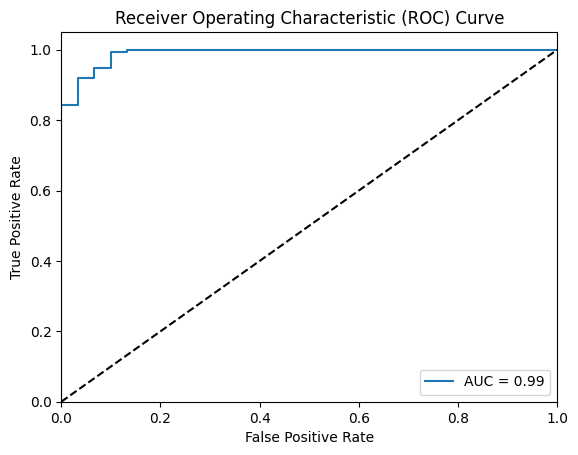

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict the probabilities of the positive class
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(len(fpr))
print(len(tpr))
print(len(thresholds))

22
22
22


In [ ]:
tpr = tpr.tolist()
fpr = fpr.tolist()
diff = [tpr[i]-fpr[i] for i in range(len(tpr))]

idx = diff.index(max(diff))

print(tpr[idx])
print(fpr[idx])

print("Optimal Threshold", thresholds[idx])


0.9949238578680203
0.1
Optimal Threshold 0.4203449424717554


In [ ]:
#Confusion matrix
#We compare labels and plot them based on correct or wrong predictions.
#Since sigmoid outputs probabilities we need to apply threshold to convert to label.

opt_thresh=0.4203

y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred = [1 if i>=opt_thresh else 0 for i in y_pred_proba]

import sklearn
cm= sklearn.metrics.confusion_matrix(y_test, y_pred)
print(cm)

true_rate =  (cm[0][0]+cm[1][1])
false_rate = (cm[0][1]+cm[1][0])

accuracy = float(true_rate/(true_rate+false_rate))
recall = float(cm[0][0]/(cm[0][0] + cm[0][1]))
precision = float(cm[0][0]/(cm[0][0] + cm[1][0]))
f1_score = 2*float(float(precision*recall)/float(precision+recall))

print("Accuracy = ", accuracy)
print("Recall = ", recall)
print("Precision = ", precision)
print("F1 Score = ", f1_score)

[[ 27   3]
 [  1 196]]
Accuracy =  0.9823788546255506
Recall =  0.9
Precision =  0.9642857142857143
F1 Score =  0.9310344827586207


## CATBOOST

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import precision_score, recall_score, f1_score
from catboost import CatBoostClassifier

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate class weights based on the class frequencies
class_counts = np.bincount(Y)
total_samples = len(Y)
class_weights = total_samples / (len(class_counts) * class_counts)

param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'scale_pos_weight': class_weights,
}

clf = CatBoostClassifier()

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=kfold)


accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []
sensitivity_list = []
roc_auc_list = []

for train_index, test_index in kfold.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    grid_search.fit(X_train, Y_train)
    y_pred = grid_search.predict(X_test)

    accuracy = grid_search.score(X_test, Y_test)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    roc_auc = roc_auc_score(Y_test, y_pred)

    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    roc_auc_list.append(roc_auc)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)


print("Accuracy List:", accuracy_list)
print("Mean Accuracy:", np.mean(accuracy_list))
print("Standard Deviation of Accuracy:", np.std(accuracy_list))
print()
print("Precision List:", precision_list)
print("Mean Precision:", np.mean(precision_list))
print("Standard Deviation of Precision:", np.std(precision_list))
print()
print("Recall List:", recall_list)
print("Mean Recall:", np.mean(recall_list))
print("Standard Deviation of Recall:", np.std(recall_list))
print()
print("F1-score List:", f1_list)
print("Mean F1-score:", np.mean(f1_list))
print("Standard Deviation of F1-score:", np.std(f1_list))
print()
print("Specificity List:", specificity_list)
print("Mean Specificity:", np.mean(specificity_list))
print("Standard Deviation of Specificity:", np.std(specificity_list))
print()
print("Sensitivity List:", sensitivity_list)
print("Mean Sensitivity:", np.mean(sensitivity_list))
print("Standard Deviation of Sensitivity:", np.std(sensitivity_list))
print()
print("AUC-ROC List:", roc_auc_list)
print("Mean AUC-ROC:", np.mean(roc_auc_list))
print("Standard Deviation of AUC-ROC:", np.std(roc_auc_list))
print()
print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Streaming output truncated to the last 5000 lines.
5:	learn: 0.6881282	total: 174ms	remaining: 28.8s
6:	learn: 0.6873462	total: 199ms	remaining: 28.3s
7:	learn: 0.6864584	total: 223ms	remaining: 27.7s
8:	learn: 0.6856848	total: 255ms	remaining: 28s
9:	learn: 0.6849526	total: 280ms	remaining: 27.7s
10:	learn: 0.6841424	total: 305ms	remaining: 27.4s
11:	learn: 0.6833236	total: 329ms	remaining: 27.1s
12:	learn: 0.6825084	total: 353ms	remaining: 26.8s
13:	learn: 0.6815924	total: 378ms	remaining: 26.6s
14:	learn: 0.6808303	total: 402ms	remaining: 26.4s
15:	learn: 0.6800908	total: 427ms	remaining: 26.2s
16:	learn: 0.6793298	total: 451ms	remaining: 26.1s
17:	learn: 0.6784738	total: 486ms	remaining: 26.5s
18:	learn: 0.6776384	total: 511ms	remaining: 26.4s
19:	learn: 0.6768470	total: 544ms	remaining: 26.6s
20:	learn: 0.6761321	total: 572ms	remaining: 26.7s
21:	learn: 0.6753512	total: 597ms	remaining: 26.6s
22:	learn: 0.6745817	total: 625ms	remaining: 26.5s
23:	learn: 0.6737527	total: 650ms	rema